<a href="https://colab.research.google.com/github/klhawker/Basic-Banking-System/blob/main/Ink_Stain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
def load_image(image_path):
  image = cv2.imread(image_path)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return img

def display_image(img, cmap=None, title=None):
  plt.imshow(img, cmap=cmap)
  plt.axis('off')
  if title:
      plt.title(title)
  plt.show()

def convert_to_grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def apply_threshold(gray_img):
  ret, binary_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  return binary_thresh

def find_contours(binary_thresh):
  contours, hierarchy = cv2.findContours(binary_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  return contours

def draw_contours(image, contours, color=(0, 0, 255), thickness=5):
  img_with_contours = image.copy()
  cv2.drawContours(img_with_contours, contours, -1, color, thickness)
  return img_with_contours

def filter_contours_by_area(contours, min_area_threshold, max_area_threshold):
  filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area_threshold and
                       cv2.contourArea(cnt) < max_area_threshold]
  return filtered_contours

def crop_largest_contour(original_image, contours):
  largest_contour = max(contours, key=cv2.contourArea)
  x, y, w, h = cv2.boundingRect(largest_contour)
  cropped = original_image[y:y+h, x:x+w]
  return cropped


def main(image_path):
  # Load and display the image
  img = load_image(image_path)
  display_image(img, title='Original Image')

  # Convert to grayscale and display
  gray = convert_to_grayscale(img)
  display_image(gray, cmap='gray', title='Grayscale Image')

  # Apply thresholding and display
  binary_thresh = apply_threshold(gray)
  display_image(binary_thresh, cmap='gray', title='Binary Threshold Image')

  # Find and draw contours
  contours = find_contours(binary_thresh)
  img_all_contours = draw_contours(img, contours)
  display_image(img_all_contours, title='All Contours')

  # Filter contours by area and display
  filtered_contours = filter_contours_by_area(contours, min_area_threshold=100000, max_area_threshold=100000000000)
  img_filtered_contours = draw_contours(img, filtered_contours, color=(0, 255, 0), thickness=2)
  display_image(img_filtered_contours, title='Filtered Contours')

  # Crop the largest contour on the original image and display
  cropped = crop_largest_contour(img, filtered_contours)
  display_image(cropped, title='Cropped Original Image')
  return cropped

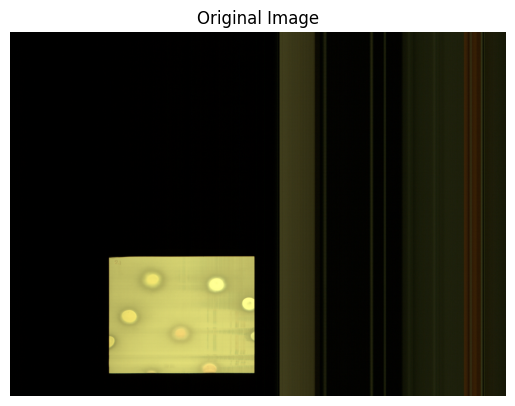

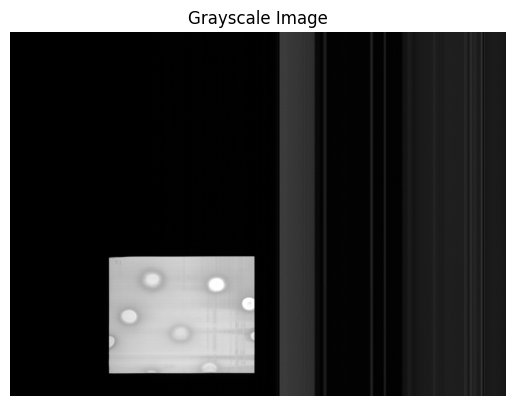

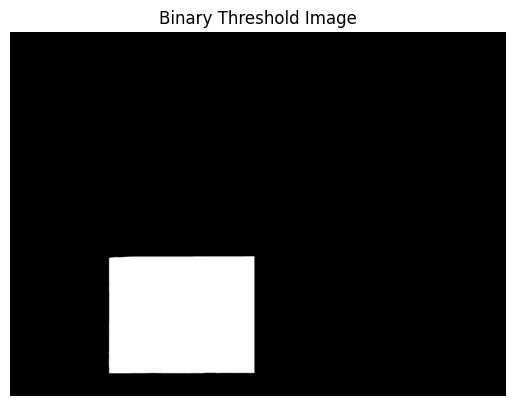

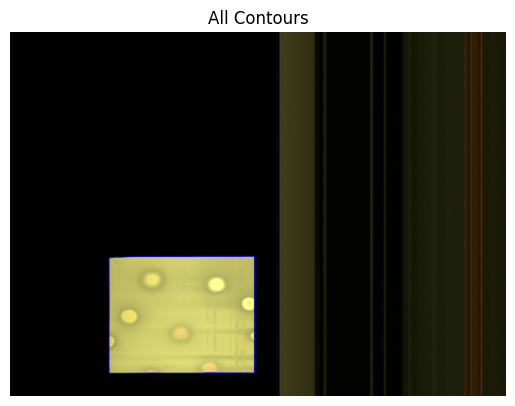

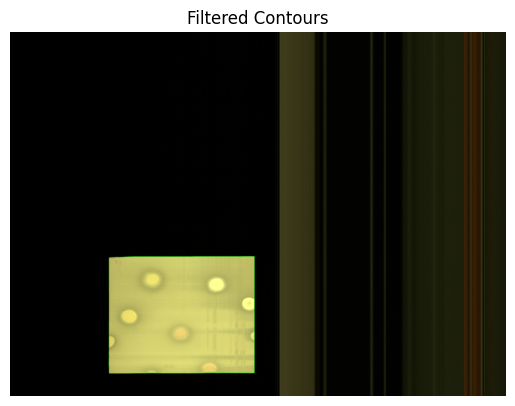

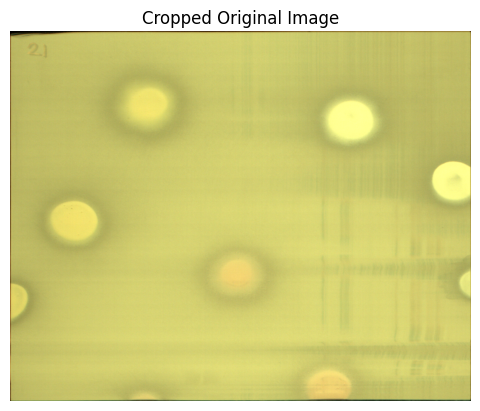

In [ ]:
ink_img = "/content/drive/MyDrive/Dataset_Small/21 Light Grey 4mm Top Surface 200us with Ink/ROI0_Bright.bmp"
cropped = main(ink_img)

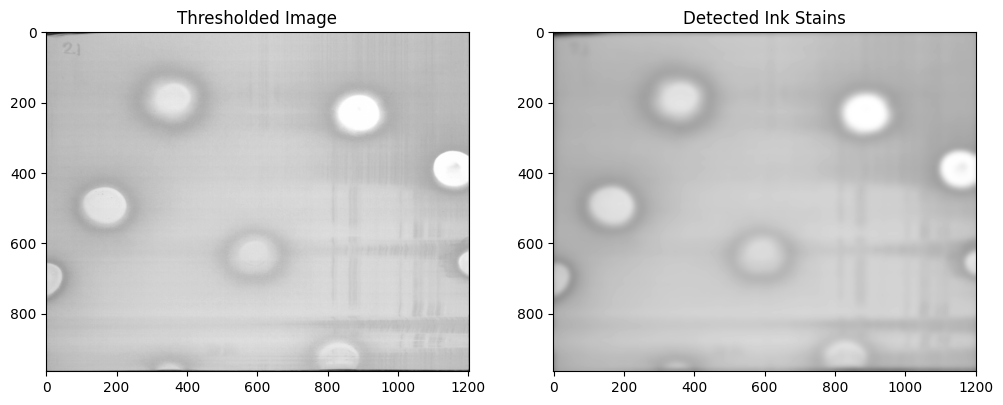

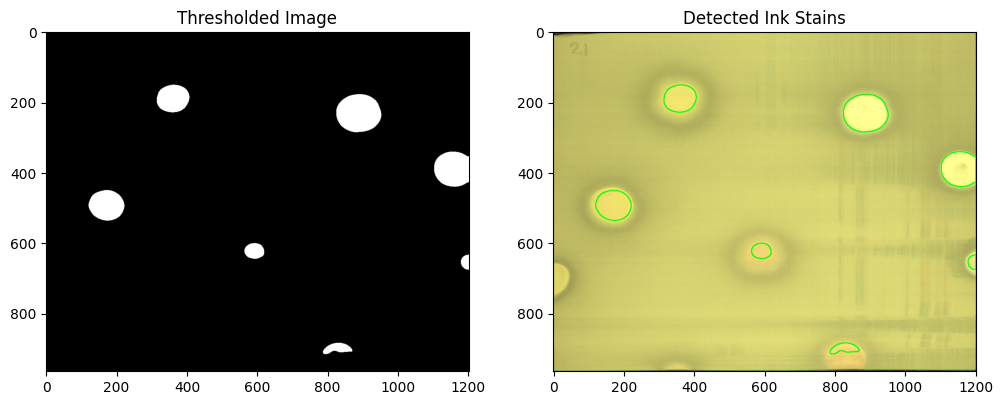

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)

# Apply Gaussian Blur with a different kernel size
blurred = cv2.GaussianBlur(gray, (45, 45), 0)

# Use adaptive thresholding
ret1,thresh1 = cv2.threshold(gray,210,255,cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(blurred,210,255,cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours by area
filtered_contours = filter_contours_by_area(contours, mi_area_threshold=10, max_area_threshold=100000)

# Draw contours on the original image
contour_image = cropped.copy()
cv2.drawContours(contour_image, filtered_contours, -1, (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Thresholded Image')
plt.imshow(gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Detected Ink Stains')
plt.imshow(blurred, cmap='gray')
plt.show()

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Thresholded Image')
plt.imshow(thresh2, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Detected Ink Stains')
plt.imshow(contour_image, cmap='gray')
plt.show()